In [1]:
import pandas as pd
import numpy as np

def compute_rsi(series, period=14):
    delta = series.diff()

    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Exponential Moving Average (lebih halus daripada SMA)
    roll_up = pd.Series(gain).ewm(span=period, adjust=False).mean()
    roll_down = pd.Series(loss).ewm(span=period, adjust=False).mean()

    rs = roll_up / roll_down
    rsi = 100 - (100 / (1 + rs))

    return rsi

def compute_tech_var(df, target_cols, lags=[1,3], mas=[3,6], rsi_period=14):
    df = df.copy()

    for col in target_cols:
        # Lag features
        for lag in lags:
            df[f"{col}_lag{lag}"] = df[col].shift(lag)

        # Moving averages
        for ma in mas:
            df[f"{col}_ma{ma}"] = df[col].rolling(window=ma).mean()

        # MoM Growth
        df[f"{col}_mom_growth"] = df[col].pct_change()

        # Rolling Volatility
        for ma in mas:
            df[f"{col}_vol{ma}"] = df[col].rolling(window=ma).std()

        # Market Share
        df[f"{col}_share"] = df[col] / df[target_cols].sum(axis=1)

        # RSI
        df[f"{col}_rsi{rsi_period}"] = compute_rsi(df[col], period=rsi_period)

    return df


In [2]:
%ls

sample_data/


In [3]:
data_link = {
    "kurs": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/kurs.csv",
    "inflasi": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/inflasi.csv",
    "bi_rate": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/bi_rate_data.csv",
    "data_eksternal": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/data_eksternal_lengkap.csv",
    "dataset_utama": "https://github.com/zzahranez/otomotive-forecasting/blob/main/data/dataCarSale2021-2025.csv",
}

In [4]:
import numpy as np

seed = 404
np.random.seed(seed)
"Done"

'Done'

In [5]:
dataframes = {}
for name, link in data_link.items():
    # Correct the raw link for direct download
    raw_link = link.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    try:
        dataframes[name] = pd.read_csv(raw_link)
        print(f"Successfully loaded '{name}' data.")
    except Exception as e:
        print(f"Error loading '{name}' data: {e}")

# Display the first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\n--- {name} Data ---")
    display(df.tail(20))

Successfully loaded 'kurs' data.
Successfully loaded 'inflasi' data.
Successfully loaded 'bi_rate' data.
Successfully loaded 'data_eksternal' data.
Successfully loaded 'dataset_utama' data.

--- kurs Data ---


,jpy,usd,tanggal
3792,10464,9412,2010-01-29
3793,10469,9455,2010-01-28
3794,10551,9427,2010-01-27
3795,10363,9362,2010-01-26
3796,10411,9387,2010-01-25
3797,10482,9435,2010-01-22
3798,10238,9366,2010-01-21
3799,10227,9321,2010-01-20
3800,10232,9271,2010-01-19
3801,10224,9276,2010-01-18



--- inflasi Data ---


,date,inflasi
167,2011-08-01,4.79
168,2011-07-01,4.61
169,2011-06-01,5.54
170,2011-05-01,5.98
171,2011-04-01,6.16
172,2011-03-01,6.65
173,2011-02-01,6.84
174,2011-01-01,7.02
175,2010-12-01,6.96
176,2010-11-01,6.33



--- bi_rate Data ---


,Tanggal,BI Rate
172,01/5/2024,6.25
173,01/6/2024,6.25
174,01/7/2024,6.25
175,01/8/2024,6.25
176,01/9/2024,6
177,01/10/2024,6
178,01/11/2024,6
179,01/12/2024,6
180,01/1/2025,5.75
181,01/2/2025,5.75



--- data_eksternal Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
112,2019-05-01,14178.0,11048.0,11761.0,8775.0,29103.0
113,2019-06-01,6020.0,7563.0,11968.0,7236.0,18541.0
114,2019-07-01,13013.0,13894.0,14600.0,8172.0,29362.0
115,2019-08-01,15415.0,11909.0,14240.0,8622.0,28929.0
116,2019-09-01,17537.0,12431.0,12712.0,8118.0,31831.0
117,2019-10-01,17530.0,14503.0,13983.0,8721.0,30944.0
118,2019-11-01,15911.0,13210.0,11974.0,10077.0,28970.0
119,2019-12-01,10855.0,12305.0,13327.0,10116.0,27453.0
120,2020-01-01,14173.0,12777.0,12295.0,10512.0,24119.0
121,2020-02-01,15778.0,11373.0,10903.0,8613.0,25053.0



--- dataset_utama Data ---


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
34,2023-11-01,7466.000,10307.000,6600.000,6602.000,24622.000
35,2024-01-01,7348.196,3222.119,5076.613,3242.000,10366.353
36,2024-02-01,6021.329,3829.318,4349.666,2999.000,10770.845
37,2024-03-01,6591.920,5212.549,4708.298,3503.000,12301.583
38,2024-04-01,7510.349,3435.000,4898.000,2555.000,9116.144
39,2024-05-01,9336.778,5055.000,5522.211,2736.000,9445.956
40,2024-06-01,7717.478,2875.069,4931.160,2198.000,10798.472
41,2024-07-01,7908.271,3703.054,5335.011,2557.000,13457.905
42,2024-08-01,7984.985,3574.084,6498.000,2582.000,11031.562
43,2024-09-01,7941.067,4418.000,6685.000,2677.000,9911.210


In [6]:
import pandas as pd

# --- Load data kurs ---
# Pastikan sudah terisi dari dataframes['kurs']
df_kurs = dataframes['kurs'].copy()

# Bersihkan kolom jpy (ada tanda koma)
df_kurs["jpy"] = df_kurs["jpy"].astype(str).str.replace(",", ".").astype(float)
df_kurs["usd"] = df_kurs["usd"].astype(float)
df_kurs["tanggal"] = pd.to_datetime(df_kurs["tanggal"])

# Agregasi kurs per bulan (ambil rata-rata)
kurs_monthly = (
    df_kurs.groupby(df_kurs["tanggal"].dt.to_period("M"))
    [["jpy", "usd"]]
    .mean()
    .reset_index()
)
kurs_monthly["tanggal"] = kurs_monthly["tanggal"].dt.to_timestamp()

# --- Load data inflasi ---
# Pastikan sudah terisi dari dataframes['inflasi']
df_inflasi = dataframes['inflasi'].copy()
df_inflasi["date"] = pd.to_datetime(df_inflasi["date"])

# Data inflasi sudah per bulan → hanya perlu diurutkan ascending
inflasi_monthly = df_inflasi.sort_values("date").reset_index(drop=True)

# --- Cek hasil ---
print("\n=== Kurs Monthly (aggregated) ===")
print(kurs_monthly.head())

print("\n=== Inflasi Monthly (sorted ascending) ===")
print(inflasi_monthly.head())



=== Kurs Monthly (aggregated) ===
     tanggal           jpy          usd
0 2010-01-01  10220.055000  9321.950000
1 2010-02-01  10405.052632  9395.105263
2 2010-03-01  10187.445455  9219.681818
3 2010-04-01   9711.700000  9072.333333
4 2010-05-01  10020.826316  9229.157895

=== Inflasi Monthly (sorted ascending) ===
        date  inflasi
0 2010-01-01     3.72
1 2010-02-01     3.81
2 2010-03-01     3.43
3 2010-04-01     3.91
4 2010-05-01     4.16


In [7]:
dataframes['kurs'] = kurs_monthly.copy()
dataframes['inflasi'] = inflasi_monthly.copy()

In [8]:
for key in dataframes:
  display(dataframes[key].head(10))

,tanggal,jpy,usd
0,2010-01-01,10220.055000,9321.950000
1,2010-02-01,10405.052632,9395.105263
2,2010-03-01,10187.445455,9219.681818
3,2010-04-01,9711.700000,9072.333333
4,2010-05-01,10020.826316,9229.157895
5,2010-06-01,10111.295455,9194.000000
6,2010-07-01,10376.954545,9094.454545
7,2010-08-01,10553.047619,9016.761905
8,2010-09-01,10688.473684,9020.842105
9,2010-10-01,10958.714286,8972.904762


,date,inflasi
0,2010-01-01,3.72
1,2010-02-01,3.81
2,2010-03-01,3.43
3,2010-04-01,3.91
4,2010-05-01,4.16
5,2010-06-01,5.05
6,2010-07-01,6.22
7,2010-08-01,6.44
8,2010-09-01,5.80
9,2010-10-01,5.67


,Tanggal,BI Rate
0,01/1/2010,6.5
1,01/2/2010,6.5
2,01/3/2010,6.5
3,01/4/2010,6.5
4,01/5/2010,6.5
5,01/6/2010,6.5
6,01/7/2010,6.5
7,01/8/2010,6.5
8,01/9/2010,6.5
9,01/10/2010,6.5


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10708.0,5970.0,9407.0,7015.0,25322.0


,waktu,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2021-01-01,8993.0,7231.0,9108.0,6400.0,15474.0
1,2021-02-01,9412.0,6812.0,7567.0,4600.0,14645.0
2,2021-03-01,16770.0,11350.0,13088.0,8669.0,26034.0
3,2021-04-01,15861.0,8474.0,13820.0,8100.0,22618.0
4,2021-05-01,8310.0,5832.0,10160.0,5341.0,17361.0
5,2021-06-01,15481.0,8782.0,8277.0,8965.0,22310.0
6,2021-07-01,9284.0,9030.0,13453.0,6274.0,20950.0
7,2021-08-01,14408.0,7337.0,13720.0,10021.0,28418.0
8,2021-09-01,17529.0,3453.0,12200.0,7515.0,32596.0
9,2021-10-01,17020.0,5861.0,13109.0,7624.0,20633.0


In [9]:
# Select the two dataframes to combine
df_eksternal = dataframes['data_eksternal'].copy()
df_utama = dataframes['dataset_utama'].copy()

# Standardize date column names and convert to datetime
df_eksternal = df_eksternal.rename(columns={'waktu': 'date'})
df_eksternal['date'] = pd.to_datetime(df_eksternal['date'])

df_utama = df_utama.rename(columns={'waktu': 'date'})
df_utama['date'] = pd.to_datetime(df_utama['date'])

# Concatenate the dataframes, placing df_utama below df_eksternal
combined_df = pd.concat([df_eksternal, df_utama], ignore_index=True)

# Sort by date
combined_df = combined_df.sort_values('date').reset_index(drop=True)

print("Combined DataFrame (data_eksternal on top, dataset_utama below):")
display(combined_df.head())
display(combined_df.tail())

Combined DataFrame (data_eksternal on top, dataset_utama below):


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,9485.0,4439.0,9544.0,6043.0,21024.0


,date,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
181,2025-03-01,6371.692,2382.924,7380.0,3223.220,13711.773
182,2025-04-01,6075.811,1590.411,5197.0,2767.379,13779.300
183,2025-05-01,7537.632,3148.000,5897.0,2004.813,9313.266
184,2025-06-01,5992.367,2360.797,6501.0,3499.336,8712.383
185,2025-07-01,6354.101,4171.007,6121.0,2666.235,7617.122


In [10]:
# Load the original bi_rate dataframe
bi_rate_df = dataframes['bi_rate'].copy()

# Convert 'Tanggal' to datetime, specifying the original format
bi_rate_df['Tanggal'] = pd.to_datetime(bi_rate_df['Tanggal'], format='%d/%m/%Y', errors='coerce')

# Set the date to the first day of the month and format as YYYY-MM-DD
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.to_period('M').dt.to_timestamp('D') + pd.offsets.MonthBegin(0)
bi_rate_df['Tanggal'] = bi_rate_df['Tanggal'].dt.strftime('%Y-%m-%d')

# Handle potential non-numeric 'BI Rate' values by coercing to numeric
bi_rate_df['BI Rate'] = pd.to_numeric(bi_rate_df['BI Rate'], errors='coerce')

# Update the dataframe in the dataframes dictionary
dataframes['bi_rate'] = bi_rate_df

print("Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:")
display(dataframes['bi_rate'].head())

Processed dataframes['bi_rate'] with 'Tanggal' in YYYY-MM-DD format:


,Tanggal,BI Rate
0,2010-01-01,6.5
1,2010-02-01,6.5
2,2010-03-01,6.5
3,2010-04-01,6.5
4,2010-05-01,6.5


In [11]:
kurs = dataframes['kurs'].copy()
inflasi = dataframes['inflasi'].copy()
bi_rate = dataframes['bi_rate'].copy()
data = combined_df.copy()

In [12]:
def combineDf(dfs):
  return pd.concat(dfs, ignore_index=True)

In [13]:
dfs = [kurs, inflasi, bi_rate, data]

In [14]:
# Standardize date columns and names before merging

# kurs
kurs_processed = dfs[0].copy()
kurs_processed = kurs_processed.rename(columns={'tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
kurs_processed['date'] = pd.to_datetime(kurs_processed['date'])


# inflasi
inflasi_processed = dfs[1].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already monthly from previous steps)
inflasi_processed['date'] = pd.to_datetime(inflasi_processed['date'])


# bi_rate
bi_rate_processed = dfs[2].copy()
bi_rate_processed = bi_rate_processed.rename(columns={'Tanggal': 'date'})
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in 8xgidzZ0qaHj)
bi_rate_processed['date'] = pd.to_datetime(bi_rate_processed['date'])
# Handle potential duplicates after standardizing date
bi_rate_processed['BI Rate'] = pd.to_numeric(bi_rate_processed['BI Rate'], errors='coerce')
bi_rate_processed = bi_rate_processed.groupby('date')['BI Rate'].mean().reset_index()


# data (combined_df)
data_processed = dfs[3].copy()
# Ensure date is datetime and set to first of month if needed (assuming it's already processed in h7AI2EbBM80d)
data_processed['date'] = pd.to_datetime(data_processed['date'])
# Handle potential duplicates after standardizing date
# Assuming all columns except date should be averaged if dates are duplicated
numeric_cols = data_processed.select_dtypes(include=np.number).columns.tolist()
data_processed = data_processed.groupby('date')[numeric_cols].mean().reset_index()


# Merge all dataframes
merged_all_df = kurs_processed
merged_all_df = pd.merge(merged_all_df, inflasi_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, bi_rate_processed, on='date', how='outer')
merged_all_df = pd.merge(merged_all_df, data_processed, on='date', how='outer')

# Sort by date
merged_all_df = merged_all_df.sort_values('date').reset_index(drop=True)

print("Merged DataFrame (all dataframes from dfs list):")
display(merged_all_df.head(10))
display(merged_all_df.tail(10))

Merged DataFrame (all dataframes from dfs list):


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0
5,2010-06-01,10111.295455,9194.000000,5.05,6.5,11886.0,5965.0,8875.0,6704.0,26006.0
6,2010-07-01,10376.954545,9094.454545,6.22,6.5,11524.0,6006.0,9586.0,5623.0,27737.0
7,2010-08-01,10553.047619,9016.761905,6.44,6.5,9741.0,6025.0,9310.0,6063.0,22638.0
8,2010-09-01,10688.473684,9020.842105,5.80,6.5,6652.0,3504.0,7299.0,4924.0,18413.0
9,2010-10-01,10958.714286,8972.904762,5.67,6.5,10708.0,5970.0,9407.0,7015.0,25322.0


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA
182,2025-03-01,11097.894737,16538.526316,1.03,5.75,6371.692,2382.924,7380.0,3223.220,13711.773
183,2025-04-01,11771.125000,16904.000000,1.95,5.75,6075.811,1590.411,5197.0,2767.379,13779.300
184,2025-05-01,11455.470588,16522.823529,1.60,5.50,7537.632,3148.000,5897.0,2004.813,9313.266
185,2025-06-01,11343.555556,16391.944444,1.87,5.50,5992.367,2360.797,6501.0,3499.336,8712.383
186,2025-07-01,11154.869565,16357.782609,2.37,5.25,6354.101,4171.007,6121.0,2666.235,7617.122
187,2025-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2025-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2025-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2025-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Save the merged dataframe to a CSV file
merged_all_df.to_csv('merged_data.csv', index=False)

print("merged_all_df saved to /tmp/merged_data.csv")

merged_all_df saved to /tmp/merged_data.csv


In [16]:
processed_df = compute_tech_var(merged_all_df, ["TOYOTA", "DAIHATSU","MITSUBISHI","HONDA","SUZUKI"])

/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-input-2023148405.py:32: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f"{col}_mom_growth"] = df[col].pct_change()
/tmp/ipython-

In [17]:
import pandas as pd

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Display the head of the processed_df
display(processed_df.head())
display(processed_df.head())

,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


,date,jpy,usd,inflasi,BI Rate,DAIHATSU,HONDA,MITSUBISHI,SUZUKI,TOYOTA,TOYOTA_lag1,TOYOTA_lag3,TOYOTA_ma3,TOYOTA_ma6,TOYOTA_mom_growth,TOYOTA_vol3,TOYOTA_vol6,TOYOTA_share,TOYOTA_rsi14,DAIHATSU_lag1,DAIHATSU_lag3,DAIHATSU_ma3,DAIHATSU_ma6,DAIHATSU_mom_growth,DAIHATSU_vol3,DAIHATSU_vol6,DAIHATSU_share,DAIHATSU_rsi14,MITSUBISHI_lag1,MITSUBISHI_lag3,MITSUBISHI_ma3,MITSUBISHI_ma6,MITSUBISHI_mom_growth,MITSUBISHI_vol3,MITSUBISHI_vol6,MITSUBISHI_share,MITSUBISHI_rsi14,HONDA_lag1,HONDA_lag3,HONDA_ma3,HONDA_ma6,HONDA_mom_growth,HONDA_vol3,HONDA_vol6,HONDA_share,HONDA_rsi14,SUZUKI_lag1,SUZUKI_lag3,SUZUKI_ma3,SUZUKI_ma6,SUZUKI_mom_growth,SUZUKI_vol3,SUZUKI_vol6,SUZUKI_share,SUZUKI_rsi14
0,2010-01-01,10220.055000,9321.950000,3.72,6.5,8302.0,3755.0,6855.0,4815.0,20798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108141,NaN
1,2010-02-01,10405.052632,9395.105263,3.81,6.5,7518.0,4431.0,8246.0,4638.0,21753.0,20798.0,NaN,NaN,NaN,0.045918,NaN,NaN,0.466943,100.000000,8302.0,NaN,NaN,NaN,-0.094435,NaN,NaN,0.161379,0.000000,6855.0,NaN,NaN,NaN,0.202918,NaN,NaN,0.177006,100.000000,3755.0,NaN,NaN,NaN,0.180027,NaN,NaN,0.095114,100.000000,4815.0,NaN,NaN,NaN,-0.036760,NaN,NaN,0.099558,0.000000
2,2010-03-01,10187.445455,9219.681818,3.43,6.5,8084.0,5179.0,9068.0,6203.0,26222.0,21753.0,NaN,22924.333333,NaN,0.205443,2895.506922,NaN,0.478888,100.000000,7518.0,NaN,7968.000000,NaN,0.075286,404.667765,NaN,0.147637,45.444813,8246.0,NaN,8056.333333,NaN,0.099685,1118.625198,NaN,0.165607,100.000000,4431.0,NaN,4455.000000,NaN,0.168811,712.303306,NaN,0.094583,100.000000,4638.0,NaN,5218.666667,NaN,0.337430,857.039283,NaN,0.113284,91.073091
3,2010-04-01,9711.700000,9072.333333,3.91,6.5,9298.0,5154.0,9560.0,6013.0,24381.0,26222.0,20798.0,24118.666667,NaN,-0.070208,2246.019665,NaN,0.448131,71.375015,8084.0,8302.0,8300.000000,NaN,0.150173,909.445985,NaN,0.170900,74.323277,9068.0,6855.0,8958.000000,NaN,0.054257,663.870469,NaN,0.175716,100.000000,5179.0,3755.0,4921.333333,NaN,-0.004827,424.825062,NaN,0.094732,97.883182,6203.0,4815.0,5618.000000,NaN,-0.030630,854.005269,NaN,0.110521,80.768742
4,2010-05-01,10020.826316,9229.157895,4.16,6.5,9485.0,4439.0,9544.0,6043.0,21024.0,24381.0,21753.0,23875.666667,NaN,-0.137689,2635.587664,NaN,0.416028,44.546204,9298.0,7518.0,8955.666667,NaN,0.020112,760.653885,NaN,0.187692,76.531273,9560.0,8246.0,9390.666667,NaN,-0.001674,279.552023,NaN,0.188859,99.185876,5154.0,4431.0,4924.000000,NaN,-0.138727,420.208282,NaN,0.087840,57.627494,6013.0,4638.0,6086.333333,NaN,0.004989,102.143690,NaN,0.119580,81.157154


In [18]:
!pip install u8darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.8/344.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found exist

In [19]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 31.6 MB/s eta 0:00:00


In [36]:
# lstm_multibrand_darts.py
# -----------------------------------------------------------
# LSTM multibrand forecasting dengan Darts (PyTorch backend)
# Target: DAIHATSU, TOYOTA, HONDA, MITSUBISHI, SUZUKI
# Past covariates: seluruh fitur non-target (termasuk engineered features)
# -----------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape, mape, rmse
from darts.models import BlockRNNModel

import matplotlib.pyplot as plt


In [245]:
TARGETS = ["DAIHATSU", "TOYOTA", "HONDA", "MITSUBISHI", "SUZUKI"]
TIME_COL = "date"
TEST_SIZE = 6                 # contoh: 24 bulan terakhir sebagai test
FREQ_FALLBACK = "MS"           # fallback freq: Monthly Start
INPUT_CHUNK_LENGTH = 24        # window input untuk LSTM
OUTPUT_CHUNK_LENGTH = 1        # set 1 agar TIDAK butuh covariates ke masa depan
EPOCHS = 400


In [234]:
def log_transform(ts: TimeSeries) -> TimeSeries:
    return ts.map(np.log1p)

def inv_log_transform(ts: TimeSeries) -> TimeSeries:
    return ts.map(np.expm1)


In [235]:
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
import random

def param_grid():
    return {
        "input_chunk_length": [12, 18, 24, 36],
        "hidden_dim": [32, 64, 128],
        "n_rnn_layers": [1, 2],
        "dropout": [0.05, 0.1, 0.2],
        "batch_size": [8, 16, 32],
        "lr": [1e-3, 5e-4],
        "epochs": [200, 350],
    }

def sample_params(grid, n=20, seed=42):
    random.seed(seed)
    keys = list(grid.keys())
    return [{k: random.choice(grid[k]) for k in keys} for _ in range(n)]

def val_score_blockrnn(p, y_train_s, X_train_s, val_len=12):
    """Fit di sub-train, prediksi ke val_len terakhir, skor sMAPE di ruang scaled-log (stabil)."""
    if len(y_train_s) <= val_len + p["input_chunk_length"] + 1:
        raise ValueError("window terlalu panjang untuk panjang data train")

    y_sub, y_val = y_train_s[:-val_len], y_train_s[-val_len:]
    X_sub, X_val = X_train_s[:-val_len], X_train_s[-val_len:]

    early_stop = EarlyStopping(monitor="val_MSE", patience=15, mode="min")
    ckpt = ModelCheckpoint(monitor="val_MSE", mode="min", save_top_k=1)

    model = BlockRNNModel(
        model="LSTM",
        input_chunk_length=p["input_chunk_length"],
        output_chunk_length=1,
        hidden_dim=p["hidden_dim"],
        n_rnn_layers=p["n_rnn_layers"],
        dropout=p["dropout"],
        batch_size=p["batch_size"],
        n_epochs=p["epochs"],
        optimizer_kwargs={"lr": p["lr"]},
        random_state=42,
        force_reset=True,
        save_checkpoints=True,
        gradient_clip_val=1.0,
        pl_trainer_kwargs={"callbacks": [early_stop, ckpt], "enable_progress_bar": False},
    )

    model.fit(series=y_sub, past_covariates=X_sub, val_series=y_val, val_past_covariates=X_val, verbose=False)

    pred_s = model.predict(n=len(y_val), series=y_sub, past_covariates=X_train_s, verbose=False)
    # Pastikan index cocok untuk metrik
    if not pred_s.time_index.equals(y_val.time_index):
        start = max(pred_s.start_time(), y_val.start_time())
        end   = min(pred_s.end_time(),   y_val.end_time())
        pred_s = pred_s.slice(start, end)
        y_val  = y_val.slice(start, end)

    return float(smape(y_val, pred_s))

def tune_blockrnn(y_train_s, X_train_s, n_trials=20, val_len=12):
    grid = param_grid()
    trials = sample_params(grid, n=n_trials)
    best = {"score": 1e9, "params": None}
    for i, p in enumerate(trials, 1):
        try:
            score = val_score_blockrnn(p, y_train_s, X_train_s, val_len=val_len)
            if score < best["score"]:
                best = {"score": score, "params": p}
            print(f"[{i}/{len(trials)}] sMAPE_val={score:.2f} → {p}")
        except Exception as e:
            print(f"[{i}] skip ({e})")
    return best


In [236]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dts

def make_calendar_covs(y: TimeSeries):
    ti = y.time_index
    month = dts(ti, attribute="month", one_hot=True)
    quarter = dts(ti, attribute="quarter", one_hot=True)
    # sin/cos musiman halus
    month_num = dts(ti, attribute="month")
    sin_m = month_num.map(lambda x: np.sin(2*np.pi*(x/12.0)))
    cos_m = month_num.map(lambda x: np.cos(2*np.pi*(x/12.0)))
    return month.stack(quarter).stack(sin_m).stack(cos_m)


In [237]:
# -----------------------------------------------------------
# 2) Preprocessing ringkas & aman dari leakage
# -----------------------------------------------------------
def prepare_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # sort & set freq rapi
    df = df.sort_values(TIME_COL)
    df[TIME_COL] = pd.to_datetime(df[TIME_COL])
    df = df.set_index(TIME_COL)

    # pastikan frekuensi reguler
    inf_freq = pd.infer_freq(df.index)
    if inf_freq is None:
        # jika tak terdeteksi, pakai fallback (bulanan)
        df = df.asfreq(FREQ_FALLBACK)
    else:
        df = df.asfreq(inf_freq)

    # interpolate time-wise lalu ffill/bfill untuk sisa NaN
    num_cols = df.columns
    df[num_cols] = df[num_cols].interpolate(method="time").ffill().bfill()

    # cast ke float32 untuk stabilitas training
    df[num_cols] = df[num_cols].astype(np.float32)

    # balikkan 'date' jadi kolom agar from_dataframe lebih eksplisit
    df = df.reset_index().rename(columns={df.index.name or TIME_COL: TIME_COL})
    return df

def build_series(df: pd.DataFrame):
    # y (multivariate target)
    y = TimeSeries.from_dataframe(
        df, time_col=TIME_COL, value_cols=TARGETS, fill_missing_dates=True, freq=None
    )
    # X (past covariates): semua kolom numeric non-target dan bukan 'date'
    cov_cols = [c for c in df.columns if c not in TARGETS + [TIME_COL]]
    X = TimeSeries.from_dataframe(
        df, time_col=TIME_COL, value_cols=cov_cols, fill_missing_dates=True, freq=None
    )
    return y, X

def train_test_split_ts(y: TimeSeries, X: TimeSeries, test_size: int):
    # split dari belakang
    y_train, y_test = y[:-test_size], y[-test_size:]
    X_train, X_test = X[:-test_size], X[-test_size:]
    return y_train, y_test, X_train, X_test

# -----------------------------------------------------------
# 3) Pipeline: prep -> series -> scaling -> model -> fit -> predict -> eval
# -----------------------------------------------------------



In [238]:
import numpy as np
import torch

def to_float32(ts):
    # Darts >=0.27 punya .astype(); kalau tidak, fallback ke .map
    try:
        return ts.astype(np.float32)
    except AttributeError:
        return ts.map(lambda v: np.float32(v))


In [261]:
from sklearn.preprocessing import RobustScaler

def run_pipeline(df: pd.DataFrame):
    df_prep = prepare_dataframe(df)
    y, X = build_series(df_prep)
    top_cols = select_topk_covs(df_prep, k=20)  # hitung korelasi di train saja
    X = X[top_cols]  # subset sebelum stack kalender
    X = X.stack(make_calendar_covs(y))

    # sanity check
    assert y.n_components == len(TARGETS), "Komponen target tidak lengkap!"
    assert len(y) > INPUT_CHUNK_LENGTH + TEST_SIZE, "Data terlalu pendek untuk konfigurasi ini."



    # split
    y_train, y_test, X_train, X_test = train_test_split_ts(y, X, TEST_SIZE)
    # --- LOG di TARGET dulu (train/test), baru scaling (hindari leakage) ---
    y_train = log_transform(y_train)
    y_test  = log_transform(y_test)

    # scaler tanpa leakage: fit hanya di TRAIN
    scaler_y = Scaler()
    scaler_X = Scaler()
    # scaler_y = Scaler(scaler=RobustScaler(quantile_range=(5,95)))
    # scaler_X = Scaler(scaler=RobustScaler(quantile_range=(5,95)))



    y_train_s = scaler_y.fit_transform(y_train)
    # y_train = to_log.transform(y_train);

    y_test_s  = scaler_y.transform(y_test)    # hanya transform
    X_train_s = scaler_X.fit_transform(X_train)
    # Untuk prediksi autoregresif dengan OUTPUT_CHUNK_LENGTH=1,
    # kita cukup sediakan past_covariates sampai akhir histori.
    # Namun aman juga jika kita transform X full utk plotting/analisis.
    X_full_s  = scaler_X.transform(X)         # optional: skala seluruh X

    y_train_s = to_float32(y_train_s)
    y_test_s  = to_float32(y_test_s)
    X_train_s = to_float32(X_train_s)
    X_full_s  = to_float32(X_full_s)


    best = tune_blockrnn(y_train_s, X_train_s, n_trials=24, val_len=12)
    # train final pakai best params, dengan validasi terakhir 10–12 titik train
    # VAL = 12
    # VAL_SIZE = 12
    # y_sub, y_val = y_train_s[:-VAL], y_train_s[-VAL:]
    # X_sub, X_val = X_train_s[:-VAL_SIZE], X_train_s[-VAL_SIZE:]

    # Fallback aman kalau tidak ada params yang berhasil
    if not best or not best.get("params"):
        print("No valid trial; using safe defaults.")
        best = {"score": None, "params": {
            "input_chunk_length": 36,
            "hidden_dim": 128,
            "n_rnn_layers": 1,
            "dropout": 0.10,
            "batch_size": 16,
            "lr": 5e-4,
            "epochs": 350,
        }}

    p = best["params"]

    # >>> VAL harus >= input_chunk_length + output_chunk_length (1)
    MIN_NEEDED = p["input_chunk_length"] + 1
    VAL_SIZE   = max(37, MIN_NEEDED)     # 12 default, tapi dinaikkan bila perlu
    optimizer_kwargs={"lr": 5e-4, "weight_decay": 1e-4}
    # Split sub-train vs valid dengan VAL_SIZE yang cukup
    y_sub, y_val = y_train_s[:-VAL_SIZE], y_train_s[-VAL_SIZE:]
    X_sub, X_val = X_train_s[:-VAL_SIZE], X_train_s[-VAL_SIZE:]

    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=20,
        mode="min",
    )

    ckpt = ModelCheckpoint(
        monitor="val_loss",
        mode="min",
        save_top_k=1,
    )




    # Model LSTM global (1 model untuk semua komponen target)
    model = BlockRNNModel(
        model="LSTM",
        input_chunk_length=p["input_chunk_length"],
        output_chunk_length=1,
        hidden_dim=p["hidden_dim"],
        n_rnn_layers=p["n_rnn_layers"],
        dropout=p["dropout"],
        batch_size=p["batch_size"],
        n_epochs=p["epochs"],
        optimizer_kwargs={"lr": p["lr"]},
        random_state=42,
        force_reset=True,
        save_checkpoints=True,
        # gradient_clip_val=1.0,
        pl_trainer_kwargs={"callbacks": [early_stop], "enable_progress_bar": True},
    )




    # Train pakai TRAIN saja (tanpa leakage)
    model.fit(series=y_sub, past_covariates=X_sub, val_series=y_val, val_past_covariates=X_val, verbose=True)


    # Forecast sepanjang test horizon (autoregresif, horizon = len(test))
    # Penting: output_chunk_length=1 -> tidak akan meminta covariates masa depan
    y_pred_s = model.predict(n=len(y_test_s), series=y_train_s, past_covariates=X_full_s, verbose=True)


    # Balikkan skala
    y_pred = scaler_y.inverse_transform(y_pred_s)
    y_pred = inv_log_transform(y_pred)   # exmp1
    y_test = inv_log_transform(y_test)

    # Evaluasi
    # === Evaluasi (overall) ===
    metrics = {
        "sMAPE": smape(y_test, y_pred),
        "MAPE":  mape(y_test, y_pred),
        "RMSE":  rmse(y_test, y_pred),
    }

    # === Evaluasi per-komponen (brand) — kompatibel semua versi Darts ===
    def eval_per_brand(y_true, y_hat, brands):
      rows = []
      for b in brands:
          yt = y_true[b]
          yp = y_hat[b]

          # Jika index waktu tidak identik, potong ke irisan yang sama
          if not yt.time_index.equals(yp.time_index):
              start = max(yt.start_time(), yp.start_time())
              end   = min(yt.end_time(),   yp.end_time())
              yt = yt.slice(start, end)
              yp = yp.slice(start, end)

          rows.append({
              "brand": b,
              "sMAPE": float(smape(yt, yp)),
              "MAPE":  float(mape(yt, yp)),
              "RMSE":  float(rmse(yt, yp)),
          })
      return pd.DataFrame(rows)


    # sanity check urutan komponen (opsional)
    assert list(y_test.components) == TARGETS == list(y_pred.components)

    per_brand = eval_per_brand(y_test, y_pred, TARGETS)
    print("\n=== METRICS per brand ===")
    print(per_brand.to_string(index=False))

    # Plot perbandingan actual vs prediksi untuk setiap brand
    fig, axes = plt.subplots(len(TARGETS), 1, figsize=(10, 2.2*len(TARGETS)), sharex=True)
    if len(TARGETS) == 1:
        axes = [axes]
    for i, brand in enumerate(TARGETS):
        # subset komponen
        y_test[brand].plot(ax=axes[i], label=f"Actual {brand}")
        y_pred[brand].plot(ax=axes[i], label=f"Pred {brand}")
        axes[i].set_title(brand)
        axes[i].legend(loc="upper left")
        axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("=== METRICS (overall) ===")
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")
    print("\n=== METRICS per brand ===")
    print(per_brand.to_string(index=False))

    # Kembalikan obyek penting kalau mau dipakai lanjut
    return {
        "model": model,
        "y_train": y_train,
        "y_test": y_test,
        "y_pred": y_pred,
        "metrics": metrics,
        "per_brand": per_brand
    }

In [262]:
# -----------------------------------------------------------
# (Opsional) Quick backtest di TRAIN (rolling 1-step)
# Memberi gambaran stabilitas model tanpa menyentuh test set
# -----------------------------------------------------------
def quick_backtest(model, y_train_s: TimeSeries, X_train_s: TimeSeries, scaler_y: Scaler):
    # historical_forecasts di bagian TRAIN saja
    back_pred_s = model.historical_forecasts(
        series=y_train_s,
        past_covariates=X_train_s,
        start=0.7,                 # mulai prediksi dari 70% panjang data train
        forecast_horizon=1,        # 1-step ahead
        stride=1,
        retrain=False,
        verbose=True,
    )
    # Kembalikan ke skala asli
    back_pred = scaler_y.inverse_transform(back_pred_s)
    return back_pred



In [263]:

def clean_inf_and_extremes(df: pd.DataFrame,
                           time_col: str = "date",
                           winsor_q=(0.005, 0.995),
                           cap_growth=5.0):
    """
    - Ganti ±inf → NaN, lalu isi dengan interpolasi time-based + ffill/bfill.
    - (Opsional) Winsorize (tahan) outlier ekstrim.
    - (Opsional) Clamp kolom growth ke ±cap_growth (mis. ±500%).
    """
    df = df.copy()
    # pastikan date tipe datetime
    df[time_col] = pd.to_datetime(df[time_col])
    df = df.sort_values(time_col)

    # ganti inf → NaN
    num_cols = [c for c in df.columns if c != time_col]
    df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

    # clamp khusus growth/rasio yang sering bikin inf / outlier liar
    growth_like = [c for c in num_cols if ("mom" in c.lower()) or ("growth" in c.lower())]
    if cap_growth is not None and cap_growth > 0:
        for c in growth_like:
            if c in df.columns:
                df[c] = df[c].clip(lower=-cap_growth, upper=cap_growth)

    # winsorize ringan (tahan outlier di quantile rendah/tinggi)
    if winsor_q is not None:
        q_low, q_hi = winsor_q
        for c in num_cols:
            ql, qh = df[c].quantile(q_low), df[c].quantile(q_hi)
            # hindari semua NaN
            if pd.isna(ql) or pd.isna(qh):
                continue
            if ql == qh:
                continue
            df[c] = df[c].clip(ql, qh)

    # isi NaN dengan interpolasi berbasis waktu + ffill/bfill
    df = df.set_index(time_col)
    df[num_cols] = df[num_cols].interpolate(method="time").ffill().bfill()
    df = df.reset_index()

    return df


In [264]:
# -----------------------------------------------------------
# RUN (hapus komentar ini jika ingin menjalankan langsung)
df = processed_df.copy().dropna()
df = clean_inf_and_extremes(df)
# results = run_pipeline(df)


ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`
ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`
ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`
ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`
ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`
ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']

[1] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[2] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[3] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[4] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[5] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[6] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[7] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[8] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[9] skip (Invalid model creation parameters. Model `BlockRNNModel` has no args/kwargs `['gradient_clip_val']`)
[

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Generating TimeSeries: 100%|██████████| 1/1 [00:00<00:00, 924.47it/s]



=== METRICS per brand ===
     brand     sMAPE      MAPE        RMSE
  DAIHATSU 16.645128 15.792923 1262.274048
    TOYOTA 19.614836 22.086142 2537.586670
     HONDA 52.641369 85.427315 2204.334473
MITSUBISHI  8.695020  8.649432  621.017334
    SUZUKI 51.157894 71.596413 1988.320923


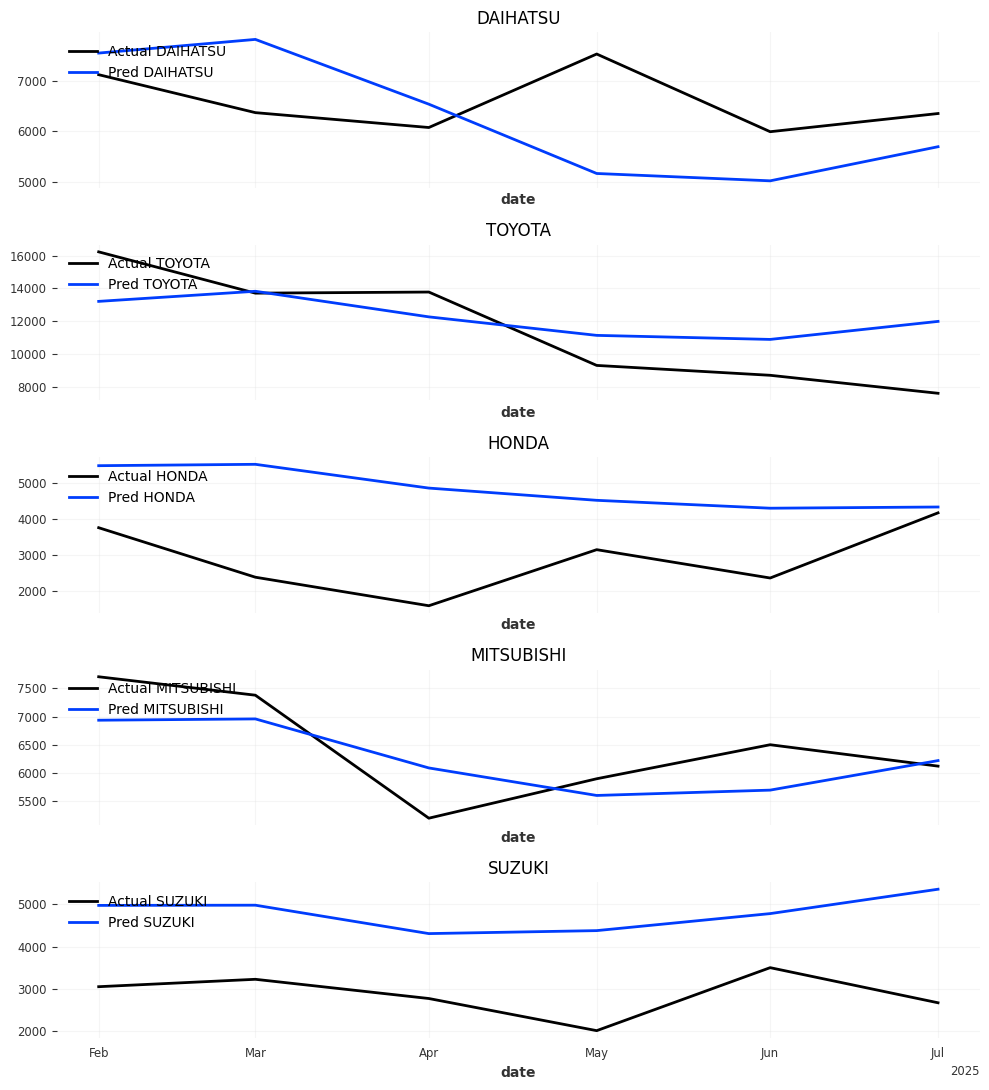

=== METRICS (overall) ===
sMAPE: 29.751
MAPE: 40.710
RMSE: 1722.707

=== METRICS per brand ===
     brand     sMAPE      MAPE        RMSE
  DAIHATSU 16.645128 15.792923 1262.274048
    TOYOTA 19.614836 22.086142 2537.586670
     HONDA 52.641369 85.427315 2204.334473
MITSUBISHI  8.695020  8.649432  621.017334
    SUZUKI 51.157894 71.596413 1988.320923


In [265]:

results = run_pipeline(df)

In [222]:
import pandas as pd
from tabulate import tabulate

per_brand = results["per_brand"]
print(tabulate(per_brand, headers="keys", tablefmt="psql", showindex=False))


+------------+---------+----------+---------+
| brand      |   sMAPE |     MAPE |    RMSE |
|------------+---------+----------+---------|
| DAIHATSU   | 20.7799 |  20.8422 | 1789.38 |
| TOYOTA     | 23.3222 |  28.268  | 3872.13 |
| HONDA      | 59.9123 | 108.362  | 3813.1  |
| MITSUBISHI | 12.326  |  12.6392 |  908.46 |
| SUZUKI     | 33.9477 |  44.2689 | 1446.33 |
+------------+---------+----------+---------+
